Exploratory Data Analysis (EDA) Report

1. Introduction

Exploratory Data Analysis (EDA) is a crucial step in understanding the structure and characteristics of a dataset before confirmatory data analysis  (CDA). (Arunkumar & Thambusamy, 2021).

1.1 Formulate questons - Providing direction for the analysis. (Midway, 2022)

- Can we use a KNN model to suggest similar neighbourhoods to Airbnb clients based on the columns in the csv file.
- Can we use a KNN model to further suggest "less busy" neighbourhoods to clients based on the columns in the csv file.
(Might need to give column names etc. But this helps set the EDA up in the correct direction)

2. Data Understanding and Preprocessing

2.1 Variable Overview

Knowing variable types and having an overview of all variables helps in selecting appropriate visualization and statistical techniques. (Dhanshetti, 2023)

2.2 Data Quality Assessment

Missing, duplicate and inconsistent variables can cause inacuate findings in the statistical analyses. (Dhanshetti, 2023)

- Missing Values: Identify missing values to decide how to deal with them. (Dhanshetti, 2023).
- Duplicates: Checked and removed to ensure data integrity.

3. Univariate Analysis

Univariate analysis examines the distribution of individual variables. 

Can use this to find outliers. Outliers are not always a bad thing. Deciding on what to do with outiers requires viewing them appropriately and then deciding based on context if they indeed need to be adjusted before analysis. Adjustments are done if the influence of outliers look to have a chance of skewing the results. (Dhanshetti, 2023)

Numerical Variables:

- Histograms with boxplots are used to assess skewness and distribution.

Categorical Variables:

- Bar plots show frequency distributions.

4. Bivariate Analysis

Identify strong and weak correlation between variables. Answer basic questions and open ideas to Multivariate Analysis. Identifying trends that may indicate important predictive features. (Dhanshetti, 2023)

Correlation Matrix & Heatmap.

Boxplots for Continuous Variables vs Target.

Cross-tabulations for Categorical Variables

5. Multivariate Analysis

Multivariate techniques help in understanding complex interactions. Helps visualize relationships between multiple variables. (Arunkumar & Thambusamy,2021)

Pair Plots:

PCA (Principal Component Analysis):

Applied to numerical variables to understand variance explained by components.

6. Conclusion

The EDA reveals patterns in the dataset relevant to predicting customer subscriptions. Building to a conclusion where questions are answered and tangible insight is now brought to the table.

References

Arunkumar, R., Thambusamy, V. (2021) An Exploratory Data Analysis Process on Groundwater Quality Data. Avaliable from: https://www.researchgate.net/publication/348351115_An_Exploratory_Data_Analysis_Process_on_Groundwater_Quality_Data [Accessed 15 March 2025]

Dhanshetti, P. (2023) Techniques of Exploratory Data Analysis. Avaliable from: https://www.researchgate.net/publication/374674185_Techniques_of_Exploratory_Data_Analysis [Accessed 14 March 2025]

Midway, S. (2022) Data Analysis in R. Avaliable from: https://bookdown.org/steve_midway/DAR/exploratory-data-analysis.html [Accessed 14 March 2025]

The dataset consists of float64, object and int64 datatypes. With less than 1% missing values found in name and host name columns. While last review and reviews per month have almost 21% missing values (10 052 missing values). With the low % of missing found in name and host name, and that i dont see those columns being used to answer our question/s. I see no need to remove the data and assume they are decisions made by the host to leave blank but still legitimate venues.

With last review and reviews per month having almost 21% missing values. The simplest solution is to set all nulls to zero. We can assume that places with zero reviews have not been visited before or not been visited enough to have any reviews. 

Another variable i find interesting is availability_365. Investigating i found that places with 0 avaliability seem to distribeted randomly. No signs of specific neighbourhood_group having no avaliability but a few neighbourhoods like New Dorp, Woodrow and Bay Terrace, Staten Island having zero avaliability.

Further investigation shows niehgbourhoods like Williamsburg with over 1377 or 35% of its listing that have more than 1 review but no avaliability. This concludes that i will keep all data on the above columns and not change anything. As i will be using column number_of_reviews to answer my question/s. As avaliability 365 does not determine how busy a place is as well as number of reviews. Down to the fact that palces can have no avaliability or low avaliability and low reviews. So number of reviews will be the best indicartor of a busy neighboorhood.

Investigating number_of_reviews. The first potenital issue i find is 4845 (around 10%) of listing that have no reviews and are not abaliable at all (0 avaliability 365). These should be removed as they are no valid locations as they are not even avaliable. These will not be able to tell if locations are busy and are assumbed to be off the market new places. Noting that i could just remove all places with avaliability 365 at 0. but the places with avaliability 365 at zero who have multiple reviews show a potentially busy place, if many of these are found in a neighbourhood or neighbourhood group they prove a great way to spot busy neighbourhoods or nieghbourhood groups. Hence i will keep places with 0 avaliability 365 who have 1 or more reviews.

Once i removed the off the market new places. number of reviews column has over 10k places with no reviews. Making it right-skewed. Showing many places have low reviews while few have many reviews. Up to 700! Indicating some very popular areas and some very unpopular areas. With outliers on both sides. 

Though it is not the prettiest we can see majority of neihgbourhoods have places with reviews except Fort Wadsworth which i will remove. Neighbourhood groups have less than 20% across all groups with no reviews. So data looks like a good sample to use to answer the question.

4. Bivariate Analysis

Comparing availability_365 and number_of_reviews provides weak Correlation Across All Measures 
- Pearson: 0.13
- Spearman: 0.09
- Kendall: 0.07

All three show a very weak positive relationship between availability_365 and number_of_reviews.

Interpretation:

Listings that are available more days might receive more reviews, but the effect is minimal.

With reviews_per_month have a slighter stronger positive relationship. I will still stick to number of reviews simply due to being an easier metric (As reviews per month has values between 0 and 1 etc) to work with in modeling and the difference in relationship not being significant. 

5. Multivariate Analysis

This plot is an example of using number of reviews to determin which neighbourhoods are busier than others. i.e. More reviews means shorter stays and more visits.

By normalising (Averaging) price, min_nights, availiability_365 and then busyness (number of reviews) i can get more and less busy places that are also similar in experience. So pricey places with low avaliability are in one places and places with high minimum nights and low price are in another area. Coloured by busyness. Giving a KKN plot that can help clients find less busy places that are similar to the experience they are looking at.

Where busy are places with a normalized number of reviews above 31.46 and less busy are places below 31.46

6. Conclusion

Using this clients can not only see similar places but are recomended a less busy place that is similar in the 3 categories.

Matt notes:

We can only show less busy places instead? If thats the goal. Not showing similar busy places.
This will help show we not only answered the clients question but are giving them a working model to us based on a full EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
import category_encoders as ce


# Load the CSV file
file_path = '../data/AB_NYC_2019.csv'
Airbnb_data_df = pd.read_csv(file_path)

# View the dataframe, show all columns and give all numeric columns as floats. So its more readable
print("Data Overview:")
pd.set_option('display.max_columns', None)

display(Airbnb_data_df)

# Count missing values per column
print("\nMissing Values:")
display(Airbnb_data_df.isnull().sum())

dtypes_df = Airbnb_data_df.dtypes.reset_index()
dtypes_df.columns = ['column_name', 'data_type']
print("Variable Types:")
display(dtypes_df)




Data Overview:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2



Missing Values:


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Variable Types:


,column_name,data_type
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,object
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,int64


# Check null columns

In [6]:
df_null_name = Airbnb_data_df[Airbnb_data_df['name'].isna()]
print('Displaying Nulls found in column name')
display(df_null_name)

df_null_host_name = Airbnb_data_df[Airbnb_data_df['host_name'].isna()]
print('Displaying Nulls found in column host_name')
display(df_null_host_name)

df_null_reviews_per_month = Airbnb_data_df[Airbnb_data_df['last_review'].isna()]
print('Displaying Nulls found in column last_review')
display(df_null_reviews_per_month)

df_null_host_listings = Airbnb_data_df[Airbnb_data_df['reviews_per_month'].isna()]
print('Displaying Nulls found in column reviews_per_month')
display(df_null_host_listings)

Displaying Nulls found in column name


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


Displaying Nulls found in column host_name


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


Displaying Nulls found in column last_review


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Displaying Nulls found in column reviews_per_month


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Check where number_of_reviews = 0 that last review and reviews per month is not null. Confirms data is integral.

In [8]:
df_reviews_zero_but_info = Airbnb_data_df[
    (Airbnb_data_df['number_of_reviews'] == 0) &
    (
        Airbnb_data_df['last_review'].notna() |
        Airbnb_data_df['reviews_per_month'].notna()
    )
]
df_reviews_zero_but_info

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


# Curious about availability_365 column

In [10]:
availability_counts = Airbnb_data_df['availability_365'].value_counts().reset_index()
availability_counts.columns = ['availability_365', 'count']
availability_counts = availability_counts.sort_values(by='count', ascending=False)

availability_counts

,availability_365,count
0,0,17533
1,365,1295
2,364,491
3,1,408
4,89,361
...,...,...
361,195,26
362,183,24
363,196,24
364,181,23


In [11]:
# Total listings per neighbourhood_group
total_counts = Airbnb_data_df['neighbourhood_group'].value_counts().reset_index()
total_counts.columns = ['neighbourhood_group', 'total_count']

# Listings with availability_365 == 0
zero_avail = Airbnb_data_df[Airbnb_data_df['availability_365'] == 0]
zero_counts = zero_avail['neighbourhood_group'].value_counts().reset_index()
zero_counts.columns = ['neighbourhood_group', 'zero_avail_count']

# Merge both
merged = pd.merge(total_counts, zero_counts, on='neighbourhood_group')

# Calculate percentage
merged['percent_zero_avail'] = (merged['zero_avail_count'] / merged['total_count'] * 100).round(2)

# Order by highest percentage
merged = merged.sort_values(by='percent_zero_avail', ascending=False).reset_index(drop=True)

display(merged)


,neighbourhood_group,total_count,zero_avail_count,percent_zero_avail
0,Brooklyn,20104,7844,39.02
1,Manhattan,21661,8102,37.40
2,Queens,5666,1368,24.14
3,Bronx,1091,177,16.22
4,Staten Island,373,42,11.26


In [12]:
# Total listings per neighbourhood
total_neighbourhood = Airbnb_data_df['neighbourhood'].value_counts().reset_index()
total_neighbourhood.columns = ['neighbourhood', 'total_count']

# Listings with availability_365 == 0
zero_neighbourhood = Airbnb_data_df[Airbnb_data_df['availability_365'] == 0]
zero_counts_neighbourhood = zero_neighbourhood['neighbourhood'].value_counts().reset_index()
zero_counts_neighbourhood.columns = ['neighbourhood', 'zero_avail_count']

# Merge both
merged_neighbourhood = pd.merge(total_neighbourhood, zero_counts_neighbourhood, on='neighbourhood')

# Calculate percentage
merged_neighbourhood['percent_zero_avail'] = (
    merged_neighbourhood['zero_avail_count'] / merged_neighbourhood['total_count'] * 100
).round(2)

# Order by highest percentage
merged_neighbourhood = merged_neighbourhood.sort_values(by='percent_zero_avail', ascending=False).reset_index(drop=True)

display(merged_neighbourhood)


,neighbourhood,total_count,zero_avail_count,percent_zero_avail
0,New Dorp,1,1,100.00
1,Woodrow,1,1,100.00
2,"Bay Terrace, Staten Island",2,2,100.00
3,Morningside Heights,346,218,63.01
4,Sea Gate,7,4,57.14
...,...,...,...,...
179,Clason Point,21,1,4.76
180,Canarsie,147,7,4.76
181,Throgs Neck,24,1,4.17
182,East New York,218,7,3.21


In [13]:
# Step 1: Filter matching listings
filtered_df = Airbnb_data_df[
    (Airbnb_data_df['availability_365'] == 0) &
    (
        (Airbnb_data_df['number_of_reviews'] > 0) |
        (Airbnb_data_df['number_of_reviews'].isna())
    )
]

# Step 2: Count matching listings per neighbourhood
matching_counts = filtered_df['neighbourhood'].value_counts().reset_index()
matching_counts.columns = ['neighbourhood', 'matching_count']

# Step 3: Get total listings per neighbourhood
total_counts = Airbnb_data_df['neighbourhood'].value_counts().reset_index()
total_counts.columns = ['neighbourhood', 'total_count']

# Step 4: Merge and calculate %
merged = pd.merge(total_counts, matching_counts, on='neighbourhood', how='left')
merged['matching_count'] = merged['matching_count'].fillna(0).astype(int)
merged['percent_matching'] = (merged['matching_count'] / merged['total_count'] * 100).round(2)

# Step 5: Sort descending by percentage
merged = merged.sort_values(by='matching_count', ascending=False).reset_index(drop=True)

display(merged)


,neighbourhood,total_count,matching_count,percent_matching
0,Williamsburg,3920,1377,35.13
1,Bedford-Stuyvesant,3714,929,25.01
2,Bushwick,2465,728,29.53
3,Harlem,2658,698,26.26
4,East Village,1853,675,36.43
...,...,...,...,...
216,Baychester,7,0,0.00
217,Midland Beach,6,0,0.00
218,Grant City,6,0,0.00
219,Bay Terrace,6,0,0.00


# Now to investigate number of reviews column

In [15]:
zero_avail_and_reviews_df = Airbnb_data_df[
    (Airbnb_data_df['availability_365'] == 0) &
    (Airbnb_data_df['number_of_reviews'] == 0)
]

display(zero_avail_and_reviews_df)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,NaN,2,0
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0
276,65556,"Room in S3rd/Bedford, Williamsburg",320422,Marlon,Brooklyn,Williamsburg,40.71368,-73.96260,Private room,60,3,0,NaN,NaN,1,0
390,118680,Spacious East Village apt near it all,599354,Bobby,Manhattan,East Village,40.73067,-73.98702,Private room,87,2,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [16]:
# Removing the above data:
Airbnb_data_df = Airbnb_data_df[
    ~((Airbnb_data_df['availability_365'] == 0) & (Airbnb_data_df['number_of_reviews'] == 0))
].reset_index(drop=True)
Airbnb_data_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44045,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
44046,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
44047,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
44048,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


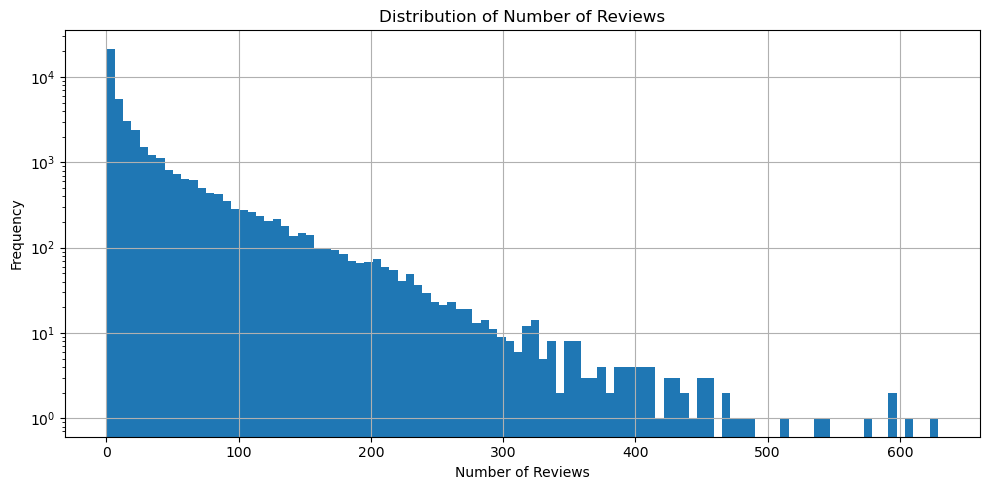

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(Airbnb_data_df['number_of_reviews'].dropna(), bins=100)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')
plt.yscale('log')  # Use log scale to better visualize outliers
plt.grid(True)
plt.tight_layout()
plt.show()


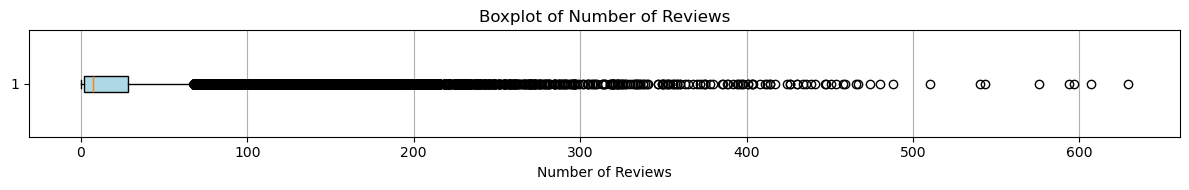

In [18]:
plt.figure(figsize=(12, 2))
plt.boxplot(Airbnb_data_df['number_of_reviews'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


,neighbourhood,total_count,zero_reviews_count,percent_zero_reviews
0,Fort Wadsworth,1,1,100.00
1,Castle Hill,9,7,77.78
2,Morrisania,14,7,50.00
3,Prince's Bay,4,2,50.00
4,New Dorp Beach,4,2,50.00
...,...,...,...,...
214,Mill Basin,4,0,0.00
215,Arden Heights,4,0,0.00
216,Spuyten Duyvil,4,0,0.00
217,Todt Hill,4,0,0.00


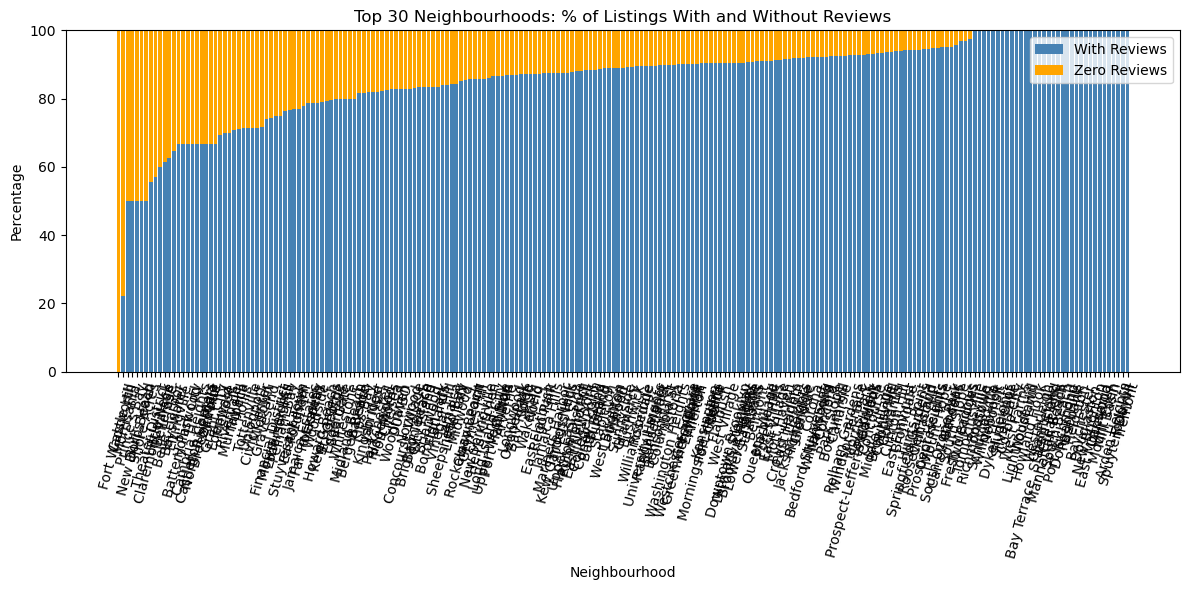

,neighbourhood_group,total_count,zero_reviews_count,percent_zero_reviews
0,Bronx,1034,158,15.28
1,Manhattan,19378,2746,14.17
2,Queens,5237,663,12.66
3,Staten Island,358,44,12.29
4,Brooklyn,18043,1596,8.85


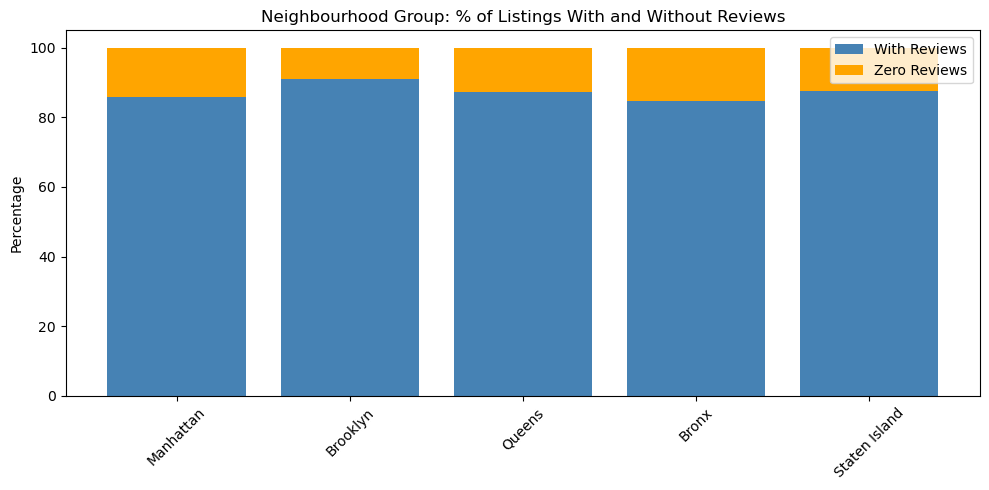

In [19]:
# By neighbourhood
neigh_total = Airbnb_data_df['neighbourhood'].value_counts().reset_index()
neigh_total.columns = ['neighbourhood', 'total_count']

neigh_zero = Airbnb_data_df[Airbnb_data_df['number_of_reviews'] == 0]['neighbourhood'].value_counts().reset_index()
neigh_zero.columns = ['neighbourhood', 'zero_reviews_count']

neigh_merged = pd.merge(neigh_total, neigh_zero, on='neighbourhood', how='left')
neigh_merged['zero_reviews_count'] = neigh_merged['zero_reviews_count'].fillna(0).astype(int)
neigh_merged['percent_zero_reviews'] = (neigh_merged['zero_reviews_count'] / neigh_merged['total_count'] * 100).round(2)

# By neighbourhood_group
group_total = Airbnb_data_df['neighbourhood_group'].value_counts().reset_index()
group_total.columns = ['neighbourhood_group', 'total_count']

group_zero = Airbnb_data_df[Airbnb_data_df['number_of_reviews'] == 0]['neighbourhood_group'].value_counts().reset_index()
group_zero.columns = ['neighbourhood_group', 'zero_reviews_count']

group_merged = pd.merge(group_total, group_zero, on='neighbourhood_group', how='left')
group_merged['zero_reviews_count'] = group_merged['zero_reviews_count'].fillna(0).astype(int)
group_merged['percent_zero_reviews'] = (group_merged['zero_reviews_count'] / group_merged['total_count'] * 100).round(2)

display(neigh_merged.sort_values(by='percent_zero_reviews', ascending=False).reset_index(drop=True))

# Sort and select top 30 by percent of zero reviews
top_neigh = neigh_merged.sort_values(by='percent_zero_reviews', ascending=False).head(1000)

top_neigh['percent_with_reviews'] = 100 - top_neigh['percent_zero_reviews']

plt.figure(figsize=(12, 6))
plt.bar(top_neigh['neighbourhood'], top_neigh['percent_with_reviews'], label='With Reviews', color='steelblue')
plt.bar(top_neigh['neighbourhood'], top_neigh['percent_zero_reviews'], 
        bottom=top_neigh['percent_with_reviews'], label='Zero Reviews', color='orange')

plt.title('Top 30 Neighbourhoods: % of Listings With and Without Reviews')
plt.ylabel('Percentage')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=75)
plt.legend()
plt.tight_layout()
plt.show()




display(group_merged.sort_values(by='percent_zero_reviews', ascending=False).reset_index(drop=True))



group_merged['percent_with_reviews'] = 100 - group_merged['percent_zero_reviews']

plt.figure(figsize=(10, 5))
plt.bar(group_merged['neighbourhood_group'], group_merged['percent_with_reviews'], label='With Reviews', color='steelblue')
plt.bar(group_merged['neighbourhood_group'], group_merged['percent_zero_reviews'], 
        bottom=group_merged['percent_with_reviews'], label='Zero Reviews', color='orange')

plt.title('Neighbourhood Group: % of Listings With and Without Reviews')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Final Dataframe before Bivariate Analysis


In [21]:
Airbnb_data_df = Airbnb_data_df[Airbnb_data_df['neighbourhood'] != 'Fort Wadsworth'].reset_index(drop=True)
print('Final Dataframe')
Airbnb_data_df

Final Dataframe


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44044,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
44045,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
44046,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
44047,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [22]:
correlation = Airbnb_data_df[['number_of_reviews', 'availability_365']].corr().iloc[0, 1]
print(f"Correlation between number_of_reviews and availability_365: {correlation:.2f}")


Correlation between number_of_reviews and availability_365: 0.13


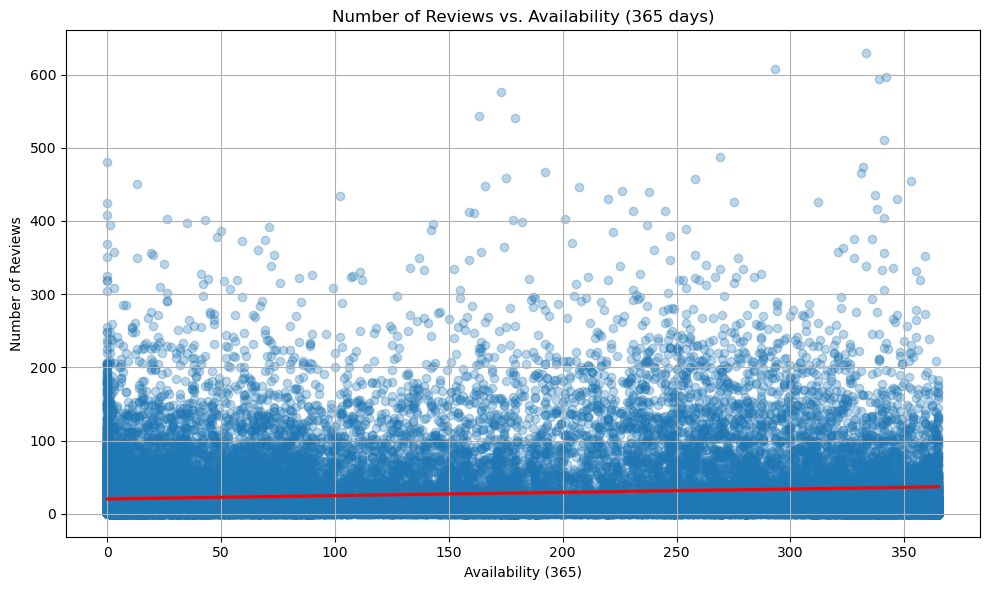

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    data=Airbnb_data_df,
    x='availability_365',
    y='number_of_reviews',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Number of Reviews vs. Availability (365 days)')
plt.xlabel('Availability (365)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Spearman (monotonic relationship)
spearman_corr = Airbnb_data_df[['number_of_reviews', 'availability_365']].corr(method='spearman').iloc[0, 1]

# Kendall (ordinal association)
kendall_corr = Airbnb_data_df[['number_of_reviews', 'availability_365']].corr(method='kendall').iloc[0, 1]

print(f"Spearman correlation: {spearman_corr:.2f}")
print(f"Kendall correlation: {kendall_corr:.2f}")


Spearman correlation: 0.09
Kendall correlation: 0.07


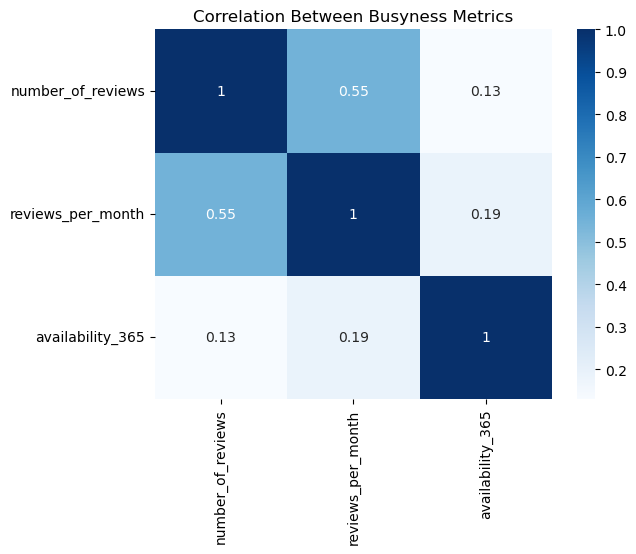

In [25]:
busyness_corr = Airbnb_data_df[['number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
sns.heatmap(busyness_corr, annot=True, cmap='Blues')
plt.title('Correlation Between Busyness Metrics')
plt.show()


Weak Correlation Across All Measures
Pearson: 0.13

Spearman: 0.09

Kendall: 0.07

All three show a very weak positive relationship between availability_365 and number_of_reviews.

Interpretation:

Listings that are available more days might receive more reviews, but the effect is minimal.

With reviews_per_month have a slighter stronger positive relationship. I will still stick to number of reviews simply due to being an easier metric to work with in modeling and the difference in relationship not being significant.


📍 You selected: Midtown (Manhattan)
✅ This is already a less busy area. Enjoy your stay!


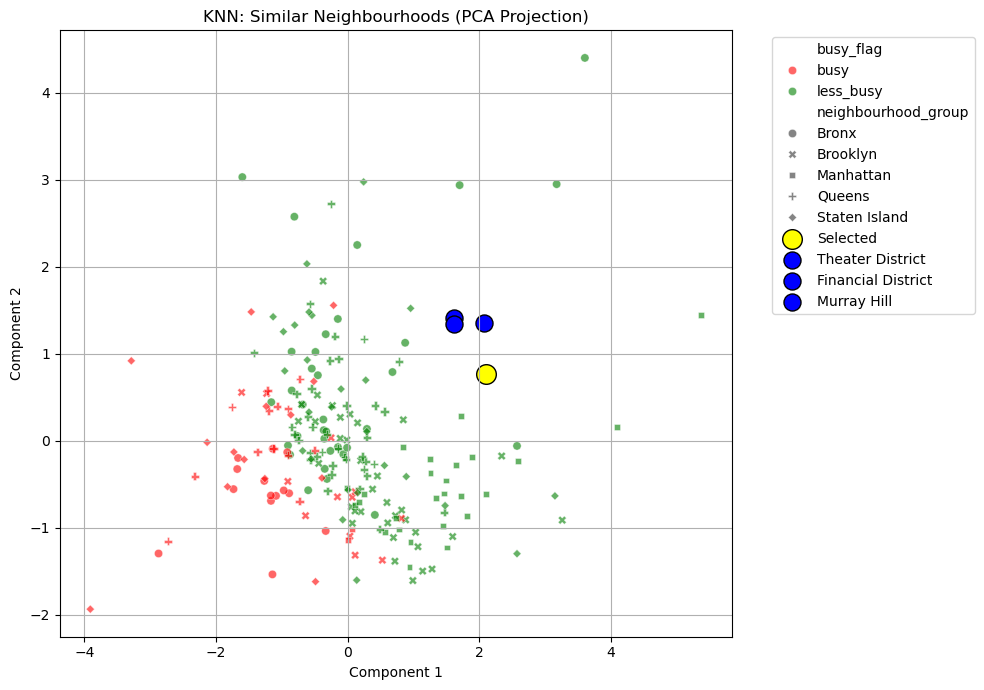

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = Airbnb_data_df

# ─── Step 0: Set busyness_score ───
df['busyness_score'] = df['number_of_reviews']

# ─── Step 1: Prepare aggregated neighbourhood-level data ───
agg = (
    df.groupby(["neighbourhood_group", "neighbourhood"])
      .agg(avg_price=("price", "mean"),
           avg_min_nights=("minimum_nights", "mean"),
           avg_avail=("availability_365", "mean"),
           mean_busyness=("busyness_score", "mean"),
           listings=("id", "count"))
      .reset_index()
)

# Flag busy vs less busy
q75 = agg["mean_busyness"].quantile(0.75)
agg["busy_flag"] = np.where(agg["mean_busyness"] >= q75, "busy", "less_busy")

# KNN setup
nbr_features = ["avg_price", "avg_min_nights", "avg_avail", "mean_busyness"]
scaler = StandardScaler()
nbr_matrix = scaler.fit_transform(agg[nbr_features])
nn = NearestNeighbors(n_neighbors=10).fit(nbr_matrix)

# ─── Step 2: User selects neighbourhood ───
selected_neigh = "Midtown"
selected_group = "Manhattan"

# Validate selection
if not ((agg["neighbourhood"] == selected_neigh) & (agg["neighbourhood_group"] == selected_group)).any():
    raise ValueError("Neighbourhood not found.")

# ─── Step 3: Find recommendations ───
query_idx = agg.index[(agg["neighbourhood"] == selected_neigh) &
                      (agg["neighbourhood_group"] == selected_group)][0]

dists, idxs = nn.kneighbors(nbr_matrix[query_idx].reshape(1, -1), n_neighbors=10)
idxs = idxs.flatten()

recommendations = (
    agg.loc[idxs]
       .query("neighbourhood_group == @selected_group and busy_flag == 'less_busy' and neighbourhood != @selected_neigh")
       .copy()
       .head(3)
)

# ─── Step 4: Explain similarities ───
print(f"\n📍 You selected: {selected_neigh} ({selected_group})")
if agg.loc[query_idx, "busy_flag"] == "busy":
    print("⚠️  This is a busy area.")
    print("✅ Here are similar, less busy areas you could stay in:\n")
    display(recommendations[["neighbourhood", "avg_price", "avg_min_nights", "avg_avail", "mean_busyness"]])

    for _, row in recommendations.iterrows():
        print(f"→ {row['neighbourhood']} is similar because:")
        print(f"   • Avg Price: ${row['avg_price']:.0f}")
        print(f"   • Min Nights: {row['avg_min_nights']:.0f}")
        print(f"   • Availability: {row['avg_avail']:.0f} days")
        print(f"   • Busyness Score: {row['mean_busyness']:.1f} (less busy)\n")
else:
    print("✅ This is already a less busy area. Enjoy your stay!")

# ─── Step 5: KNN Plot ───
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(nbr_matrix)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=coords_2d[:, 0], y=coords_2d[:, 1],
                hue=agg["busy_flag"], style=agg["neighbourhood_group"],
                palette={"busy": "red", "less_busy": "green"},
                alpha=0.6)

# Highlight selected and recommended points
plt.scatter(coords_2d[query_idx, 0], coords_2d[query_idx, 1],
            s=200, edgecolor='black', facecolor='yellow', label="Selected")

for rec_neigh in recommendations["neighbourhood"]:
    rec_idx = agg.index[(agg["neighbourhood"] == rec_neigh) &
                        (agg["neighbourhood_group"] == selected_group)].values[0]
    plt.scatter(coords_2d[rec_idx, 0], coords_2d[rec_idx, 1],
                s=150, edgecolor='black', facecolor='blue', label=rec_neigh)

plt.title("KNN: Similar Neighbourhoods (PCA Projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


This plot is an example of using number of reviews to determin which neighbourhoods are busier than others. i.e. More reviews means shorter stays and more visits.

By normalising (Averaging) price, min_nights, availiability_365 and then busyness (number of reviews) i can get more and less busy places that are also similar in experience. So pricey places with low avaliability are in one places and places with high minimum nights and low price are in another area. Coloured by busyness. Giving a KKN plot that can help clients find less busy places that are similar to the experience they are looking at.

Where busy are places with a normalized number of reviews above 31.46 and less busy are places below 31.46

In [29]:
# Print busyness threshold and value range
print("📊 Busyness Score Threshold for 'busy' classification:")
print(f"Threshold (75th percentile): {q75:.2f}")
print(f"Range of mean_busyness values:")
print(f"  - Less busy: {agg['mean_busyness'].min():.2f} to {q75:.2f}")
print(f"  - Busy: > {q75:.2f} to {agg['mean_busyness'].max():.2f}")


📊 Busyness Score Threshold for 'busy' classification:
Threshold (75th percentile): 31.46
Range of mean_busyness values:
  - Less busy: 1.50 to 31.46
  - Busy: > 31.46 to 118.50


In [30]:
# 📘 Airbnb Neighbourhood Recommender Interactive Demo
# Author: Your Name
# Purpose: Recommend less-busy but similar areas using KNN + t-SNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import time

# ⸺️ 1. Load and Prepare Data
df = Airbnb_data_df.copy()
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# Define busyness strictly by number of reviews
df["busyness_score"] = df["number_of_reviews"]

# Aggregate key features
agg = (
    df.groupby(["neighbourhood_group", "neighbourhood"])
      .agg(avg_price=("price", "mean"),
           avg_min_nights=("minimum_nights", "mean"),
           avg_avail=("availability_365", "mean"),
           mean_busyness=("busyness_score", "mean"),
           listings=("id", "count"))
      .reset_index()
)

# Flag top 25% busiest areas
q75 = agg["mean_busyness"].quantile(0.75)
agg["busy_flag"] = np.where(agg["mean_busyness"] >= q75, "busy", "less_busy")

# Normalize only non-busyness features for similarity
nbr_features = ["avg_price", "avg_min_nights", "avg_avail", "mean_busyness"]
scaler = StandardScaler()
nbr_matrix = scaler.fit_transform(agg[nbr_features])
n_neighbors = min(10, len(agg)-1)
nn = NearestNeighbors(n_neighbors=n_neighbors).fit(nbr_matrix)

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(nbr_matrix)

# Widgets
group_dd = widgets.Dropdown(
    options=sorted(agg["neighbourhood_group"].unique()),
    description="Group:",
    layout=widgets.Layout(width="50%")
)

neigh_dd = widgets.Dropdown(
    options=[],
    description="Neighbourhood:",
    disabled=True,
    layout=widgets.Layout(width="70%")
)

def update_neigh_dropdown(*args):
    selected_group = group_dd.value
    if selected_group is None:
        neigh_dd.options = []
        neigh_dd.disabled = True
    else:
        matching = sorted(
            agg[agg["neighbourhood_group"] == selected_group]["neighbourhood"].unique()
        )
        neigh_dd.options = matching
        neigh_dd.disabled = False
        if matching:
            neigh_dd.value = matching[0]

group_dd.observe(update_neigh_dropdown, names="value")
group_dd.value = group_dd.options[0]
update_neigh_dropdown()

run_button = widgets.Button(
    description="🔍 Find Similar Neighbourhoods",
    button_style='primary',
    layout=widgets.Layout(width="60%")
)

output_box = widgets.Output()

# Recommender Logic
def recommend_and_plot(group, neigh):
    output_box.clear_output(wait=True)
    group = group.strip().title()
    neigh = neigh.strip().title()

    with output_box:
        display(Markdown(f"## 🔎 Neighbourhood Selected: **{neigh}** in **{group}**"))
        time.sleep(0.8)

        match = agg[(agg["neighbourhood_group"] == group) &
                    (agg["neighbourhood"] == neigh)]

        if match.empty:
            display(Markdown("❌ **Invalid neighbourhood selected. Try another.**"))
            return

        idx = match.index[0]
        is_less_busy = match["busy_flag"].values[0] == "less_busy"

        dists, idxs = nn.kneighbors(nbr_matrix[idx].reshape(1, -1), n_neighbors=n_neighbors)
        idxs = idxs.flatten()
        dists = dists.flatten()

        similar_df = agg.loc[idxs].copy()
        similar_df["distance"] = dists
        similar_df = similar_df[similar_df["neighbourhood"] != neigh]
        top_similar = similar_df.head(3).reset_index()

        group_less_busy = agg[(agg["neighbourhood_group"] == group) &
                              (agg["busy_flag"] == "less_busy") &
                              (agg["neighbourhood"] != neigh)].copy()

        best_less_busy = None
        if not group_less_busy.empty:
            distances = nbr_matrix[group_less_busy.index] - nbr_matrix[idx]
            group_less_busy.loc[:, "distance"] = np.linalg.norm(distances, axis=1)
            best_less_busy = group_less_busy.sort_values(by="distance").iloc[0]

        row = match.iloc[0]
        display(Markdown("### ℹ️ Selected Neighbourhood Details:"))
        display(Markdown(
            f"- **{row['neighbourhood']}**<br>"
            f"  💰 ${row['avg_price']:.0f}, 🛎 {row['avg_min_nights']:.0f} nights, "
            f"🗓 {row['avg_avail']:.0f} avail/year, 🔊 Busyness: {row['mean_busyness']:.1f} "
            f"({row['busy_flag'].capitalize()})"
        ))

        if is_less_busy:
            display(Markdown("✅ This area is already **less busy**. Great choice!"))

        display(Markdown("### 📊 Top 3 Most Similar Neighbourhoods:"))
        for _, row in top_similar.iterrows():
            flag = "✅" if row["busy_flag"] == "less_busy" else "⚠️"
            reason = "" if row["busy_flag"] == "less_busy" else " - Not less busy"
            display(Markdown(
                f"- {flag} **{row['neighbourhood']}** (Distance: {row['distance']:.3f}){reason}<br>"
                f"  💰 ${row['avg_price']:.0f}, 🛎 {row['avg_min_nights']:.0f} nights, "
                f"🗓 {row['avg_avail']:.0f} avail/year, 🔊 Busyness: {row['mean_busyness']:.1f}"
            ))

        if best_less_busy is not None:
            display(Markdown("### 🧽 Closest Less Busy Neighbourhood Overall:"))
            display(Markdown(
                f"**{best_less_busy['neighbourhood']}** (Distance: {best_less_busy['distance']:.3f})<br>"
                f"💰 ${best_less_busy['avg_price']:.0f}, 🛎 {best_less_busy['avg_min_nights']:.0f} nights, "
                f"🗓 {best_less_busy['avg_avail']:.0f} avail/year, 🔊 Busyness: {best_less_busy['mean_busyness']:.1f}"
            ))
        else:
            display(Markdown("⚠️ No less busy neighbourhoods exist in this group."))

        plt.figure(figsize=(11, 7))
        sns.scatterplot(x=coords_2d[:, 0], y=coords_2d[:, 1],
                        hue=agg["busy_flag"], style=agg["neighbourhood_group"],
                        palette={"busy": "red", "less_busy": "green"}, alpha=0.5)

        plt.scatter(coords_2d[idx, 0], coords_2d[idx, 1],
                    s=250, edgecolor='black', facecolor='yellow', label="Selected")

        for _, row in top_similar.iterrows():
            i = row["index"]
            color = 'blue' if row["busy_flag"] == "less_busy" else 'gray'
            plt.scatter(coords_2d[i, 0], coords_2d[i, 1],
                        s=180, edgecolor='black', facecolor=color,
                        label=f"{row['neighbourhood']} ({row['distance']:.2f})")

        if best_less_busy is not None:
            best_idx = agg.index.get_loc(best_less_busy.name)
            plt.scatter(coords_2d[best_idx, 0], coords_2d[best_idx, 1],
                        s=200, edgecolor='black', facecolor='green',
                        label=f"Closest Less Busy: {best_less_busy['neighbourhood']}")

        plt.title("PCA Neighbourhood Similarity Map")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.grid(True)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

run_button.on_click(lambda b: recommend_and_plot(group_dd.value, neigh_dd.value))

# Interface
display(Markdown("## 🔍 Select a neighbourhood to get similar, less busy suggestions"))
display(widgets.HBox([group_dd, neigh_dd]))
display(run_button)
display(output_box)

## 🔍 Select a neighbourhood to get similar, less busy suggestions

Button(button_style='primary', description='🔍 Find Similar Neighbourhoods', layout=Layout(width='60%'), style=…

Output()

Using this clients can not only see similar places but are recomended a less busy place that is similar in the 3 categories.

Matt notes:
- We can only show less busy places instead? If thats the goal. Not showing similar busy places.
- This will help show we not only answered the clients question but are giving them a working model to us based on a full EDA